In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.pipeline  import make_union
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
import time

In [5]:
# Load csv
df_raw =pd.read_csv("London_bike_sharing_dataset.csv", parse_dates=["timestamp"])

# Arbeitskopie erstellen
df = df_raw.copy()

df['Datum'] = pd.to_datetime(df['timestamp']).dt.date
df['Zeit'] = pd.to_datetime(df['timestamp']).dt.time
df['Stunde'] = pd.to_datetime(df['timestamp']).dt.hour
df['Tag'] = pd.to_datetime(df['timestamp']).dt.day
df['Monat'] = pd.to_datetime(df['timestamp']).dt.month
df['Wochentag'] = pd.to_datetime(df['timestamp']).dt.weekday

# ausgewählte Daten
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

# Train-Test Split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)

# Preprocessing
numerical_features = ['t1', 't2', 'hum', 'wind_speed']
categorical_features = ['weather_code', 'is_holiday', 'is_weekend', 'season', 'Stunde', 'Monat', 'Tag']

numerical_pipeline = make_pipeline(StandardScaler(), PCA(n_components=3))
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

preprocessor = make_column_transformer(
    (numerical_pipeline, numerical_features),
    (categorical_pipeline, categorical_features)
)


In [17]:
#predict für einige Werte 

In [6]:
model=make_pipeline(preprocessor,SVR(kernel='rbf', C=1e3))
model.fit(Xtrain,ytrain)
model
model.score(Xtrain,ytrain)

0.9541132525703618

In [ ]:
#cross_val_score

In [7]:
Scores2=cross_val_score(model, Xtrain, ytrain, cv=5) 
Scores2

array([0.92080787, 0.92741957, 0.92097109, 0.93720509, 0.92682433])

In [ ]:
#GridSearchCV

In [8]:
param={
'svr__gamma' : [1e-2, 1e-1]}
start = time.time()
grid=GridSearchCV(model,param_grid=param)
grid.fit(Xtrain,ytrain)
end=time.time()

In [9]:
print(f"Laufzeit: {end - start:.2f} Sekunden")

Laufzeit: 138.98 Sekunden


In [18]:
y_pred=grid.best_estimator_.predict(Xtest)

In [10]:
#Fehler

In [11]:
r=r2_score(ytest,y_pred)
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
print('mse',mse)
print('r2_score',r)
print('mae',mae)

mse 66684.15350507636
r2_score 0.9440733924641438
mae 151.13031953990384


Text(0.5, 0, 'Error (ytest - y_pred)')

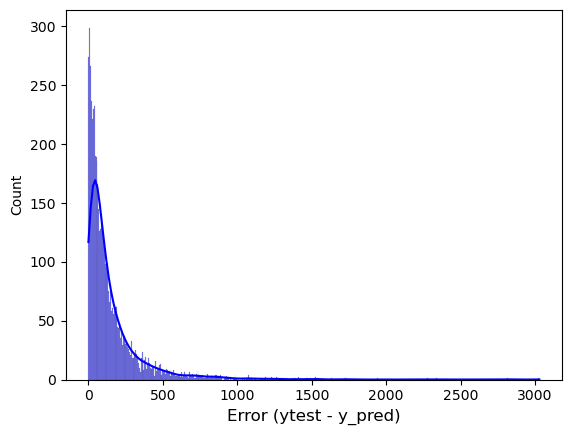

In [25]:
sns.histplot(abs(ytest-y_pred), bins=500, kde=True, color='blue')
plt.xlabel("Error (ytest - y_pred)", fontsize=12)

In [ ]:
y-0.2*y<ypred<y+0.2*y